## **KPI's: Indicadores Clave de Rendimiento**


Los KPI's (Key Performance Indicators) son fundamentales para medir el éxito y el progreso de una estrategia, ya que permiten enfocarse en aspectos clave del negocio. Nos proporcionan una forma objetiva de evaluar el desempeño en relación con los objetivos definidos.

Luego de un análisis exhaustivo, hemos identificado tres KPI's cruciales que capturan las métricas más relevantes para nuestro proyecto. En este notebook, vamos a profundizar en el análisis de estos tres indicadores, evaluando su impacto y trazando las tendencias que marcarán nuestras decisiones futuras. El objetivo de este análisis es determinar objetivos razonables para los siguientes KPI's a futuro.

 ### Preparacion de los Datasets: 

In [88]:
#Importaciones:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [89]:
DFreviews = pd.read_parquet("C:\\Users\\fede\\Downloads\\reviews_ml.parquet")
DFmetadatos =  pd.read_parquet("C:\\Users\\fede\\Downloads\\metadatos_ml.parquet")
#estos DataFrames cuentan con datos unicamente de restaurantes de comida chinos, con estos haremos los calculos pertinentes.

#nos quedamos unicamente con las series que necesitamos.
DFmetadatos = DFmetadatos[['name', 'gmap_id', 'avg_rating', 'nombre_estado', 'num_of_reviews','city']]
DFreviews = DFreviews [['name','rating','gmap_id','Year','state']]

# Combinar los DataFrames
DFcombinado = pd.merge(DFmetadatos, DFreviews, on='gmap_id', how='left')

DFcombinadoCG = DFcombinado[DFcombinado['name_x'] == 'China Garden' ]

In [90]:
DFmetadatos

,name,gmap_id,avg_rating,nombre_estado,num_of_reviews,city
0,Master Wok,0x89e657be410b4b03:0xca8c6b385241609,2.5,Connecticut,2,Manchester
1,T Bear Express,0x89e7d954b02ac119:0xd179b14d98cd4238,4.9,Connecticut,48,New Haven
2,Szechuan One,0x89e6f6dc815f1567:0x36c39a34cf804f30,1.7,Connecticut,3,Ellington
3,Lucky house (colchester),0x89e6438ee818eced:0x9ab1c850b58968d,4.9,Connecticut,8,Colchester
4,Expess Wings & Pizzeria,0x89c6fd7a865b9cff:0x37883801825436e3,2.8,Delaware,28,Wilmington
...,...,...,...,...,...,...
5228,China One,0x88570bb348f397ef:0xd75448931f6e4fe8,4.7,South Carolina,15,Cowpens
5229,Shun Xing Restaurant,0x89ba73d4597d044d:0x432599f05f9df733,4.7,Virginia,63,Mathews
5230,Dragon's Chinese Grill,0x89b3617e7df7238d:0xd6a34e2e132ad900,4.7,Virginia,78,Waynesboro
5231,Chinese Gourmet Restaurant,0x89babf6b4f95312f:0xa59df9f01888764,4.7,Virginia,6,Virginia Beach


In [91]:
DFreviews

,name,rating,gmap_id,Year,state
43754,Andrew Cembor,4,0x88f5a4f6fbb1b6cb:0x94e653b86cacc,2018,Georgia
43755,Nathanael LHeureux,5,0x88f5a4f6fbb1b6cb:0x94e653b86cacc,2018,Georgia
43756,Andy Statia,4,0x88f5a4f6fbb1b6cb:0x94e653b86cacc,2018,Georgia
43757,Dee Henry,5,0x88f5a4f6fbb1b6cb:0x94e653b86cacc,2018,Georgia
43758,David Sisung,5,0x88f5a4f6fbb1b6cb:0x94e653b86cacc,2018,Georgia
...,...,...,...,...,...
217106,Anthony Cali,3,0x89fb395e35a06289:0x2d9ba2614a7d5a66,2021,Massachusetts
217107,dawn m,5,0x89fb395e35a06289:0x2d9ba2614a7d5a66,2021,Massachusetts
217108,Henry Smith,5,0x89fb395e35a06289:0x2d9ba2614a7d5a66,2021,Massachusetts
217109,Nicholas James,5,0x89fb395e35a06289:0x2d9ba2614a7d5a66,2021,Massachusetts


In [92]:
DFreviews = DFreviews[['Year', 'name']]
DFreviews.groupby(['Year']).agg({
    'name': 'count',
}).reset_index()

,Year,name
0,2018,49847
1,2019,69388
2,2020,34598
3,2021,19524


In [93]:
DFcombinado.head(1)


,name_x,gmap_id,avg_rating,nombre_estado,num_of_reviews,city,name_y,rating,Year,state
0,Master Wok,0x89e657be410b4b03:0xca8c6b385241609,2.5,Connecticut,2,Manchester,NaN,NaN,NaN,NaN


In [94]:
NaNs = DFcombinado['rating'].isna().sum()
NaNs
#podemos ver que de 173.000 filas solo hay 1000 con valores NaNs, por lo que el merge se realizó correctamente

np.int64(1118)

In [95]:
DFreviews.head(1)

,Year,name
43754,2018,Andrew Cembor


In [96]:
DFmetadatos.head(1)

,name,gmap_id,avg_rating,nombre_estado,num_of_reviews,city
0,Master Wok,0x89e657be410b4b03:0xca8c6b385241609,2.5,Connecticut,2,Manchester



 ## **Puntuación promedio de satisfacción del cliente por local**
 
 Las puntuaciones de satisfacción del cliente son de suma importancia, ya que nos proporcionan una medida cuantitativa y general de las experiencias de los clientes. En esencia, representan una evaluación directa y valiosa de la calidad del servicio que se ofrece.
 Para nuestra consultora, es esencial que nuestro cliente no solo conozca su puntaje promedio en todos los locales, sino que también comprenda el estado actual de cada uno de ellos. Esto les permitirá evaluar y comparar sus sistemas de gestión por local, identificando las prácticas que funcionan mejor en los locales con puntajes más altos y las áreas que necesitan mejoras en aquellos con puntajes más bajos. 
 De esta manera, podrán establecer un objetivo claro: construir un sistema de gestión unificado y eficiente en todas las locaciones, logrando así la consistencia en la calidad del servicio y el aumento en la satisfacción del cliente.



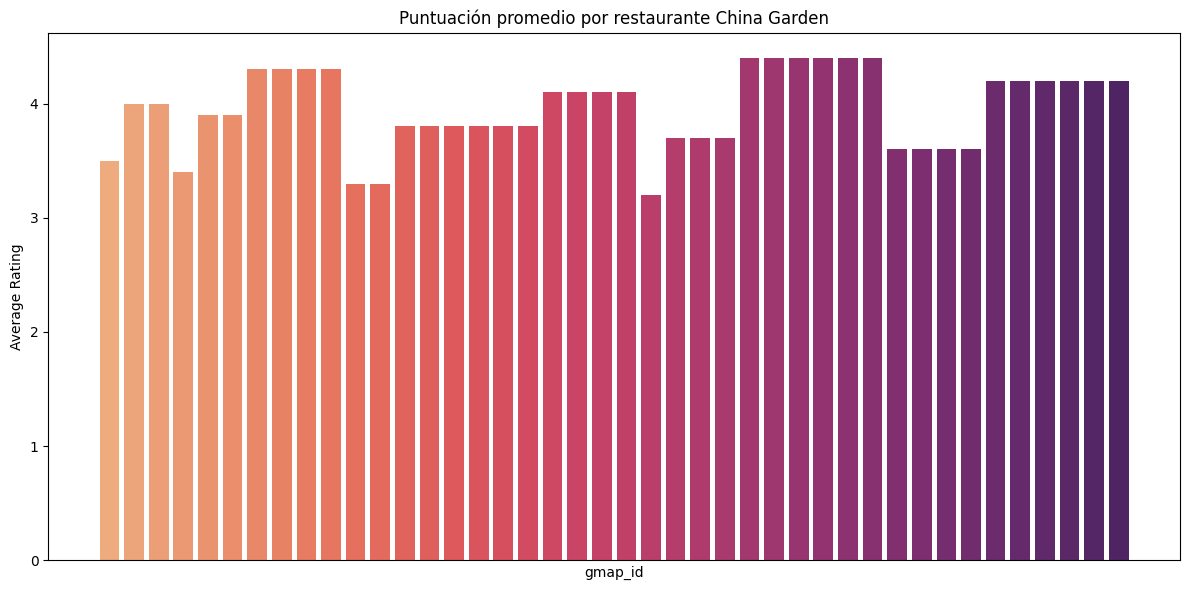

In [97]:
# Filtrar el DataFrame para China Garden
DFmetadatosCG = DFmetadatos[DFmetadatos['name'] == 'China Garden'] 
DFmetadatosCG = DFmetadatosCG.reset_index(drop=True)

# Establecer la paleta de colores
colors = sns.color_palette("flare", n_colors=len(DFmetadatosCG))

# Crear el gráfico de barras
plt.figure(figsize=(12, 6)) 
plt.bar(DFmetadatosCG['gmap_id'], DFmetadatosCG['avg_rating'], color=colors)

# Configurar los ejes y el título
plt.xlabel('gmap_id')
plt.ylabel('Average Rating')
plt.title('Puntuación promedio por restaurante China Garden')

# Quitar los nombres del eje X
plt.xticks([]) 

plt.tight_layout() 
plt.show()


In [98]:
# Calcular las métricas de rating
RatingPromedio = DFmetadatosCG['avg_rating'].mean()
RatingMediana = DFmetadatosCG['avg_rating'].median()
RatingModa = DFmetadatosCG['avg_rating'].mode()[0] 

# Imprimir los resultados redondeados a dos decimales
print("El rating promedio es:", round(RatingPromedio, 2))
print("La mediana del rating es:", round(RatingMediana, 2))
print("La moda del rating es:", round(RatingModa, 2))


El rating promedio es: 3.95
La mediana del rating es: 4.0
La moda del rating es: 3.8


### conclusión:
Actualmente, el promedio de rating de los locales es de 3.95. Este valor refleja una variabilidad en la calidad de los servicios ofrecidos. Los mejores locales alcanzan una puntuación de 4.5, lo que indica un nivel de satisfacción del cliente elevado, mientras que los locales con menor rendimiento se encuentran cerca de 3.2.

Dado este contexto, el objetivo es elevar la puntuación de todos los locales al 4.5. Esta meta se considera alcanzable y suficientemente buena, ya que una puntuación de 4.5 no solo mejora la percepción del público, sino que también puede traducirse en un incremento en la afluencia de clientes y, por ende, en un crecimiento sostenido del negocio. Por lo que el objetivo de este KPI será pasar de una media de 4 a una de 4,5 en los proximos 6 meses.

 
 ## **Tasa de crecimiento de reseñas**

Cálculo:

Aunque el cambio porcentual de este KPI a lo largo del tiempo no garantiza una representación exacta de la variación en el número total de clientes que visitan los restaurantes, es evidente que la probabilidad de recibir reseñas está vinculada al tamaño de la clientela. Por lo tanto, este KPI proporciona una perspectiva indirecta pero valiosa sobre si se está ganando o perdiendo clientes. Un aumento en el número de reseñas podría indicar un mayor compromiso y lealtad de los clientes, mientras que una disminución podría reflejar una menor satisfacción o interés.

Además, el análisis temporal de este KPI permite identificar momentos específicos en los que se producen cambios significativos en la tendencia. Esto facilita la revisión de las medidas o acciones implementadas durante esos periodos, permitiendo reconocer prácticas valiosas para la retención y el crecimiento de la clientela.


### Hitórico Cantidad de reseñas:

Cantidad de reseñas por local:

In [99]:
# Filtrar las columnas necesarias
DFcombinadoCGParaLocal = DFcombinadoCG[['gmap_id', 'num_of_reviews', 'Year']]

# Agrupar por 'gmap_id' y 'Year', sumando num_of_reviews y tomando la mediana de Year
DFcombinadoCGLocal = DFcombinadoCGParaLocal.groupby(['gmap_id', 'Year']).agg({
    'num_of_reviews': 'sum',
}).reset_index()


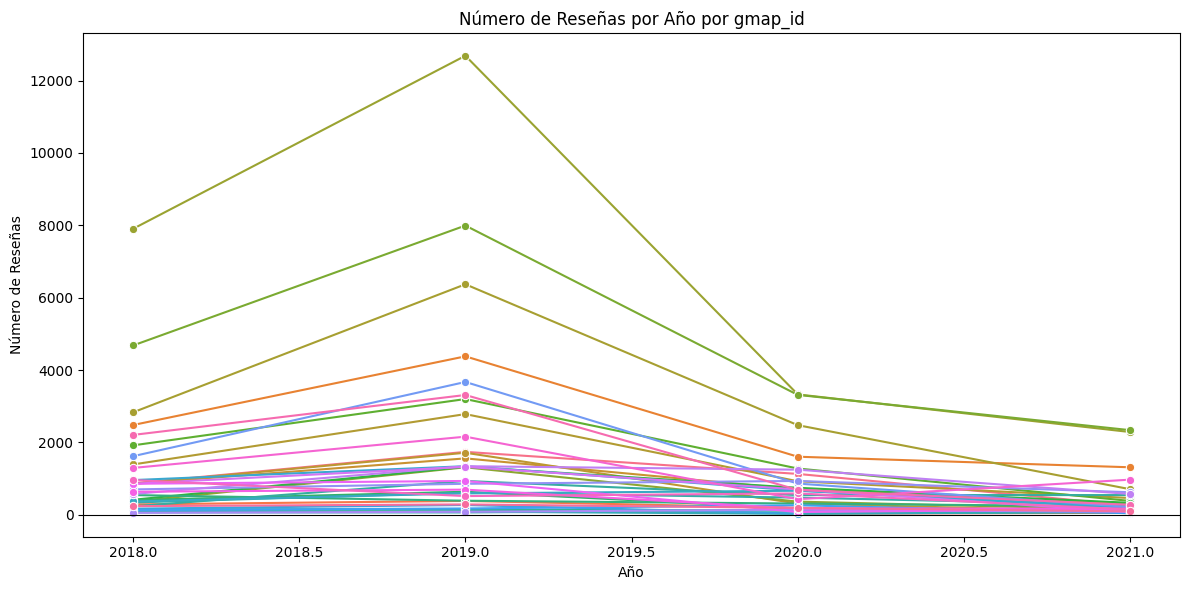

In [100]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=DFcombinadoCGLocal, x='Year', y='num_of_reviews', hue='gmap_id', marker='o', legend=False)

plt.xlabel('Año')
plt.ylabel('Número de Reseñas')
plt.title('Número de Reseñas por Año por gmap_id')
plt.axhline(0, color='black', linewidth=0.8) 

plt.tight_layout()  
plt.show()

In [101]:
print('media: ',DFcombinadoCGLocal['num_of_reviews'].mean().round(2))
print('mediana: ',DFcombinadoCGLocal['num_of_reviews'].median())
print('moda: ',DFcombinadoCGLocal['num_of_reviews'].mode())

media:  1026.3
mediana:  518.0
moda:  0    858
Name: num_of_reviews, dtype: int64


Como podemos observar en este gráfico la cantidad de reviews por local está muy dispersa, siendo que hay locales que multiplican varias veces la cantidad de reseñas de otros. Habiendo outsiders (principalmente dos) que están muy por encima de los otros 

### *Calculo de tasa de crecimiento y comparación con la competencia*

### Tasa de crecimiento:

In [102]:
DFcombinadoCGparaAños = DFcombinadoCG[['num_of_reviews', 'avg_rating', 'Year']]
DFcombinadoCGAño = DFcombinadoCGparaAños.groupby('Year').agg({
    'num_of_reviews': 'sum',  
    'avg_rating': 'mean'     
}).reset_index()
DFcombinadoCGAño


,Year,num_of_reviews,avg_rating
0,2018.0,38761,3.969477
1,2019.0,66060,3.972743
2,2020.0,25914,3.991057
3,2021.0,13973,3.992308


In [103]:
# Inicializar la lista para almacenar las tasas de reseñas
TasaReseñas = []

for x in range(1, len(DFcombinadoCGAño)):  # Comenzar desde 1 para evitar el índice -1
    Tasa = (DFcombinadoCGAño['num_of_reviews'].iloc[x] - DFcombinadoCGAño['num_of_reviews'].iloc[x-1]) / DFcombinadoCGAño['num_of_reviews'].iloc[x]
    TasaReseñas.append(round(Tasa, 2))  # Redondear la tasa a 2 decimales y agregarla a la lista

# Agregar la lista como una nueva columna en el DataFrame
DFcombinadoCGAño['TasaReseñas'] = [None] + TasaReseñas  

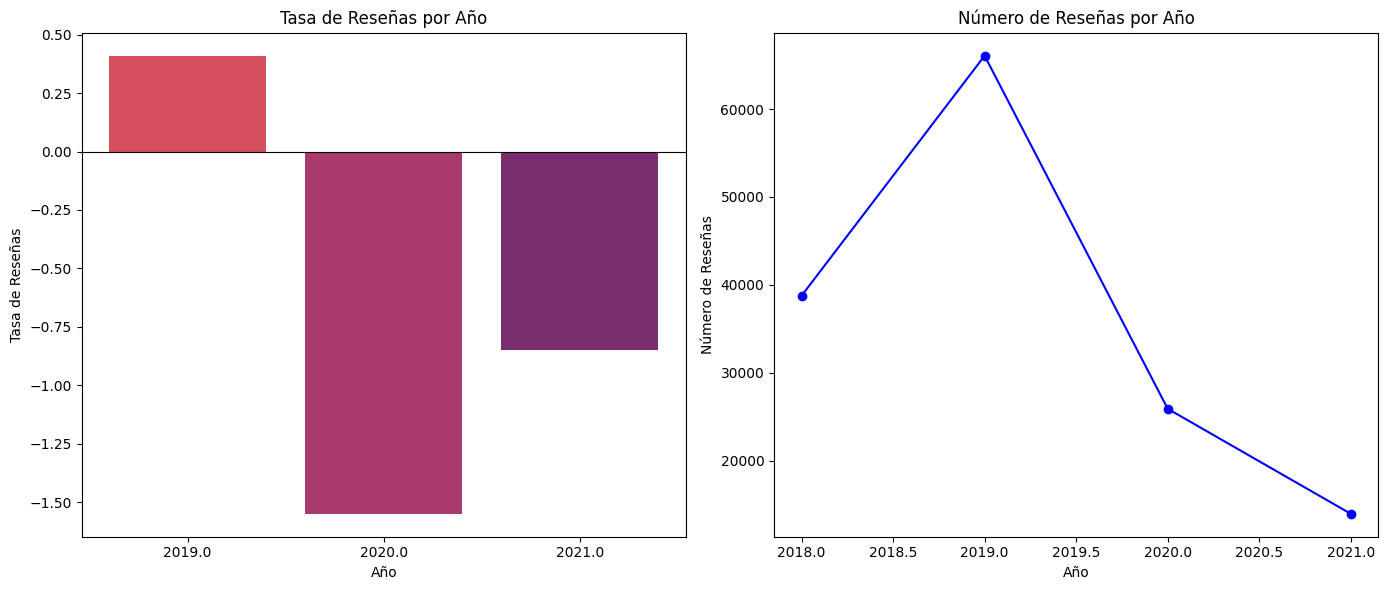

In [104]:

fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))  # Dos gráficos en una fila

# Gráfico de barras
colors = sns.color_palette("flare", n_colors=len(DFcombinadoCGAño))
ax1[0].bar(DFcombinadoCGAño['Year'].astype(str), DFcombinadoCGAño['TasaReseñas'], color=colors)
ax1[0].axhline(0, color='black', linewidth=0.8)  # Línea horizontal en y=0
ax1[0].set_xlabel('Año')
ax1[0].set_ylabel('Tasa de Reseñas')
ax1[0].set_title('Tasa de Reseñas por Año')

# Gráfico de líneas
ax1[1].plot(DFcombinadoCGAño['Year'], DFcombinadoCGAño['num_of_reviews'], marker='o', color='blue')
ax1[1].set_xlabel('Año')
ax1[1].set_ylabel('Número de Reseñas')
ax1[1].set_title('Número de Reseñas por Año')

# Ajustar el diseño para que no se superponga
plt.tight_layout()  
plt.show()


Las claras disminuciones observadas en los años 2020 y 2021 pueden explicarse en gran parte por el impacto de la pandemia de COVID-19. Además, es importante señalar que los datos de 2021 solo están actualizados hasta septiembre, por lo que aún no se dispone de la información completa de ese año.

### Comparación con China wok Numero de reseñas:
China Wok es el lider en el sector, es con diferencia la cadena con más locales y está en el top 3 de cadenas con más comentarios, por lo que nos compararemos con estos para ver a donde debemos apuntar.

In [105]:

DFcombinadoCW = DFcombinado[DFcombinado['name_x'] == 'China Wok' ]

DFcombinadoCWparaAños = DFcombinadoCW[['num_of_reviews', 'avg_rating', 'Year']]
DFcombinadoCWAño = DFcombinadoCWparaAños.groupby('Year').agg({
    'num_of_reviews': 'sum',  
    'avg_rating': 'mean'     
}).reset_index()
DFcombinadoCWAño

,Year,num_of_reviews,avg_rating
0,2018.0,71930,3.958638
1,2019.0,141064,3.939013
2,2020.0,73074,3.955644
3,2021.0,33961,4.012733


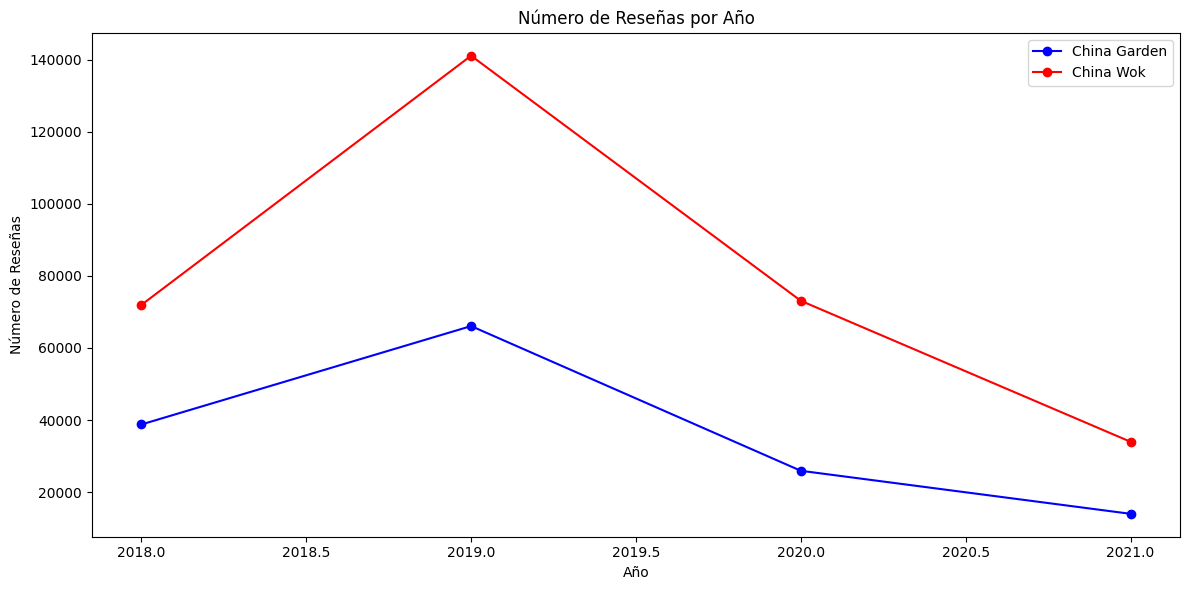

In [106]:

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(DFcombinadoCGAño['Year'], DFcombinadoCGAño['num_of_reviews'], marker='o', color='blue', label='China Garden')

# Gráfico de líneas para China Wok
ax.plot(DFcombinadoCWAño['Year'], DFcombinadoCWAño['num_of_reviews'], marker='o', color='red', label='China Wok')

# Configurar los ejes y el título
ax.set_xlabel('Año')
ax.set_ylabel('Número de Reseñas')
ax.set_title('Número de Reseñas por Año')

# Añadir la leyenda
ax.legend()

# Ajustar el diseño para que no se superponga
plt.tight_layout()  
plt.show()


### conclusiones:

Como podemos ver, la forma de los gráficos se asemeja mucho, por lo que podemos decir que la disminución en las reseñas fue algo generalizado debido al contexto socioeconómico, y no algo exclusivo de nuestro cliente.

En cuanto a las predicciones para fines de 2021 y 2022 para nuestro KPI, tomando en cuenta que este es un número relativo y que se ve afectado por el valor del periodo anterior (el cual fue muy bajo por estas situaciones extraordinarias), si el contexto vuelve a la normalidad, podemos esperar para el próximo año una tasa que, cuanto menos, sea positiva. La estimamos entre 2 y 3, lo que supondría para 2022 tener entre treinta mil y cuarenta mil comentarios (lo cual no es mucho considerando los comentarios de años anteriores).


## **Índice de competitividad local**

   
Cálculo: 

Evaluar la competitividad del restaurante por áreas es crucial para nuestro cliente. Un valor alto en este KPI indicaría que el restaurante es percibido por los clientes como superior en calidad respecto a sus competidores cercanos, mientras que un valor bajo sugeriría que el negocio se encuentra por debajo del estándar local, abriendo la oportunidad para áreas de mejora en la calidad del servicio, la comida o la experiencia general. Además, esta comparación nos permite identificar los restaurantes con las mejores prácticas en una zona determinada, información vital que permitirá observar cuáles son las acciones implementadas por la competencia que funcionan con el público local y de esta manera adaptarlas en la línea de negocio del cliente.

In [112]:
#creamos un DF agrupado por ciudad y después nos quedamos unicamente con las ciudades en als que tenemos locales

DFmetadatosporciudad = DFmetadatos[['city', 'avg_rating']]  
DFmetadatosporciudad = DFmetadatosporciudad.groupby('city').agg({
    'avg_rating': 'mean'
}).reset_index()


DFpromedioporciudad = DFmetadatosporciudad[DFmetadatosporciudad['city'].isin(DFmetadatosCG['city'])]


In [124]:

DFpromedioCG = DFmetadatosCG[['city', 'avg_rating']].merge(DFmetadatosporciudad[['city', 'avg_rating']], on='city', suffixes=('_CG', '_porciudad'))
DFpromedioCG['IndiceCompetitividadLocal'] = DFpromedioCG['avg_rating_CG'] / DFpromedioCG['avg_rating_porciudad']*100


C:\Users\fede\AppData\Local\Temp\ipykernel_4636\832006359.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=DFpromedioCG_melt, x='city', y='Value', hue='Rating', palette='Set2', ci=None)  # Eliminar intervalos de confianza
C:\Users\fede\AppData\Local\Temp\ipykernel_4636\832006359.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=DFpromedioCG_sorted, x='city', y='IndiceCompetitividadLocal', palette='flare', ci=None)
C:\Users\fede\AppData\Local\Temp\ipykernel_4636\832006359.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=DFpromedioCG_sorted, x='city', y='IndiceCompetitividadLocal', palette='flare', ci=None)


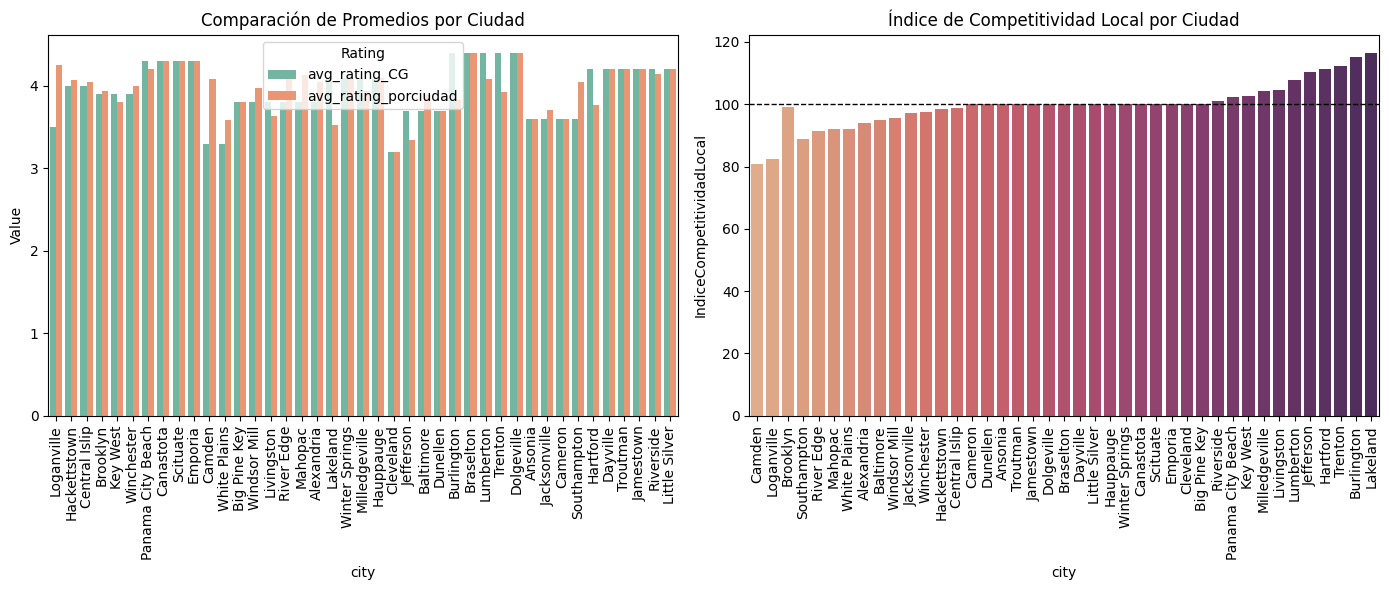

In [126]:

# Configurar el tamaño de los gráficos
plt.figure(figsize=(14, 6))

# 1. Gráfico de barras lado a lado para avg_rating_CG y avg_rating_porciudad
plt.subplot(1, 2, 1)
DFpromedioCG_melt = DFpromedioCG.melt(id_vars='city', value_vars=['avg_rating_CG', 'avg_rating_porciudad'], 
                                      var_name='Rating', value_name='Value')

# Crear gráfico con barras lado a lado
sns.barplot(data=DFpromedioCG_melt, x='city', y='Value', hue='Rating', palette='Set2', ci=None)  # Eliminar intervalos de confianza
plt.title('Comparación de Promedios por Ciudad')
plt.xticks(rotation=90)

# 2. Gráfico de barras para IndiceCompetitividadLocal, ordenado y con paleta 'flare', sin intervalos de confianza
plt.subplot(1, 2, 2)
DFpromedioCG_sorted = DFpromedioCG.sort_values(by='IndiceCompetitividadLocal')  # Ordenar de menor a mayor
sns.barplot(data=DFpromedioCG_sorted, x='city', y='IndiceCompetitividadLocal', palette='flare', ci=None)
plt.axhline(y=100, color='black', linestyle='--', linewidth=1)
plt.title('Índice de Competitividad Local por Ciudad')
plt.xticks(rotation=90)

# Mostrar gráficos
plt.tight_layout()
plt.show()

### Conclusión:
El análisis del Índice de Competitividad Local por Ciudad revela una variación significativa en los índices entre las diferentes ciudades, que oscilan desde aproximadamente 80 hasta más de 115. Las ciudades que se destacan en el extremo derecho del gráfico, como Lakeland, Burlington y Jefferson City, presentan los índices más altos, superando claramente la media de 100. En contraste, las ciudades ubicadas en el extremo izquierdo, como Camden, Flint y Brownsville, muestran los índices más bajos, situándose significativamente por debajo de la media.

La distribución de los datos indica que la mayoría de las ciudades se agrupan alrededor o ligeramente por encima de la línea de 100, lo que sugiere que muchas de ellas están cerca o justo por encima de la media en términos de competitividad. Sin embargo, aproximadamente un tercio de las ciudades se encuentran por debajo de la línea de 100, lo que señala oportunidades significativas para mejorar su competitividad local.

Además, se observa una clara polarización entre las ciudades más y menos competitivas, con algunas que destacan notablemente en ambos extremos. Aunque el gráfico no especifica los factores que contribuyen a estos índices, se sugiere que existen diferencias sustanciales en áreas como infraestructura, políticas económicas, educación e innovación entre las ciudades.

Este índice podría ser una herramienta valiosa para los responsables políticos, ayudándoles a identificar áreas que requieren mejoras y a aprender de las estrategias implementadas por las ciudades más competitivas. Para comprender completamente las razones detrás de estas diferencias, sería necesario llevar a cabo un análisis más profundo de los factores específicos que conforman este índice de competitividad. En conjunto, estas observaciones proporcionan una visión general de la competitividad relativa entre las ciudades, destacando tanto a los líderes como a aquellas áreas que requieren atención, y sugiriendo la necesidad de estrategias específicas para impulsar la competitividad en las ciudades con menor desempeño.
